In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
from extract import extract
from transform import transform
from load import load

extract()
transform()
load()

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from config import TARGET_PATH
from config import FOLDER_NAME
from load import OWID_FILE_NAME

OWID_COLUMNS = [
    'iso_code', 'continent', 'location', 'date',
    
    'total_cases', 'total_cases_normalized',
    'total_deaths', 'total_deaths_normalized', 
    
    'new_cases', 'new_cases_smoothed', 'new_cases_smoothed_normalized',
    'new_deaths', 'new_deaths_smoothed', 'new_deaths_smoothed_normalized',
    
    'people_vaccinated', 'people_vaccinated_interpolated', 'people_vaccinated_interpolated_normalized', 
    'people_fully_vaccinated', 'people_fully_vaccinated_interpolated', 'people_fully_vaccinated_interpolated_normalized',
    
    'hosp_patients', 'hosp_patients_normalized'
]

file_path = os.path.join(TARGET_PATH, FOLDER_NAME, OWID_FILE_NAME)
df = pd.read_csv(file_path)
df = df[OWID_COLUMNS].fillna(0)
#df = df[(df['date'] > '2021-01-01') & (df['date'] < '2021-10-25')]
df = df[(df['date'] < '2021-10-25')]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 312 to 630
Data columns (total 22 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   iso_code                                         319 non-null    object 
 1   continent                                        319 non-null    object 
 2   location                                         319 non-null    object 
 3   date                                             319 non-null    object 
 4   total_cases                                      319 non-null    float64
 5   total_cases_normalized                           319 non-null    float64
 6   total_deaths                                     319 non-null    float64
 7   total_deaths_normalized                          319 non-null    float64
 8   new_cases                                        319 non-null    float64
 9   new_cases_smoothed            

<AxesSubplot:title={'center':'Normalized People Vaccinated (1 and 2 doses) and Hospitalizations'}>

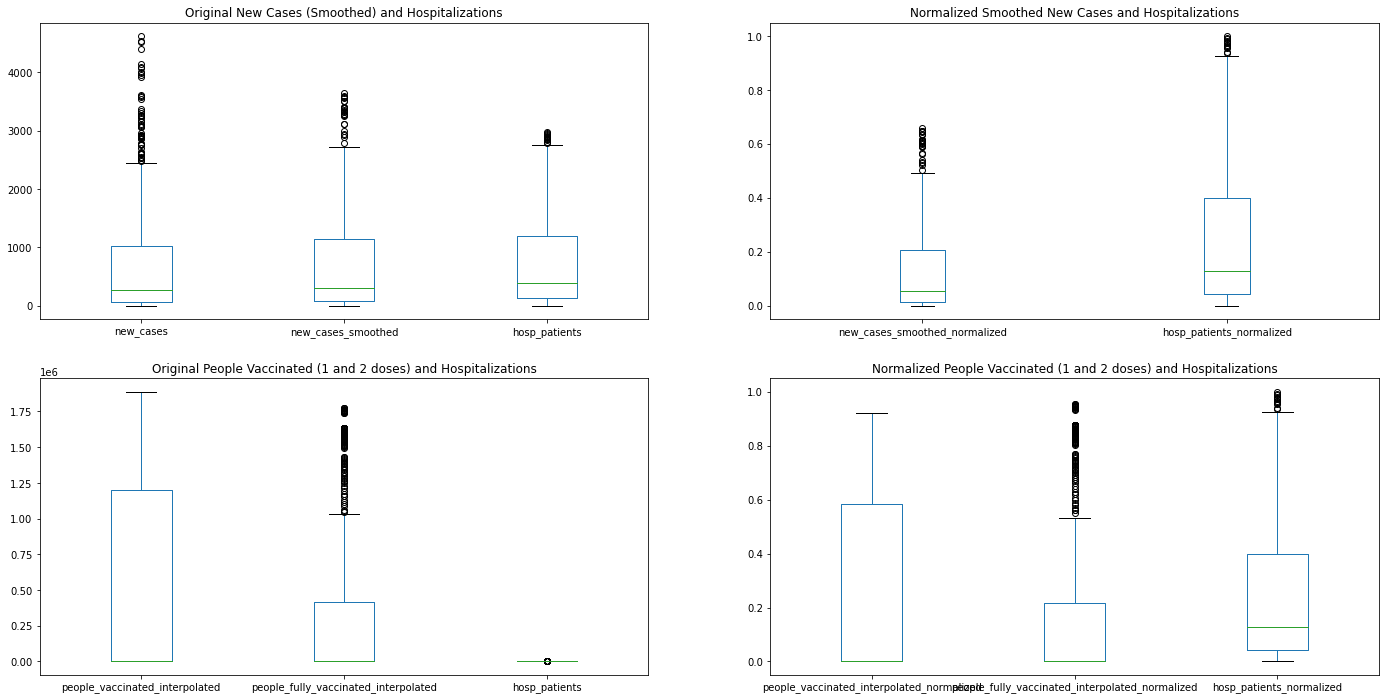

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))

ax[0, 0].set_title('Original New Cases (Smoothed) and Hospitalizations')
ax[0, 1].set_title('Normalized Smoothed New Cases and Hospitalizations')
ax[1, 0].set_title('Original People Vaccinated (1 and 2 doses) and Hospitalizations')
ax[1, 1].set_title('Normalized People Vaccinated (1 and 2 doses) and Hospitalizations')

df[[
    'new_cases',
    'new_cases_smoothed',
    'hosp_patients'
]].plot(kind='box', ax=ax[0, 0])

df[[
    'new_cases_smoothed_normalized',
    'hosp_patients_normalized'
]].plot(kind='box', ax=ax[0, 1])

df[[
    'people_vaccinated_interpolated', 
    'people_fully_vaccinated_interpolated',
    'hosp_patients'
]].plot(kind='box', ax=ax[1, 0])

df[[
    'people_vaccinated_interpolated_normalized', 
    'people_fully_vaccinated_interpolated_normalized',
    'hosp_patients_normalized'
]].plot(kind='box', ax=ax[1, 1])

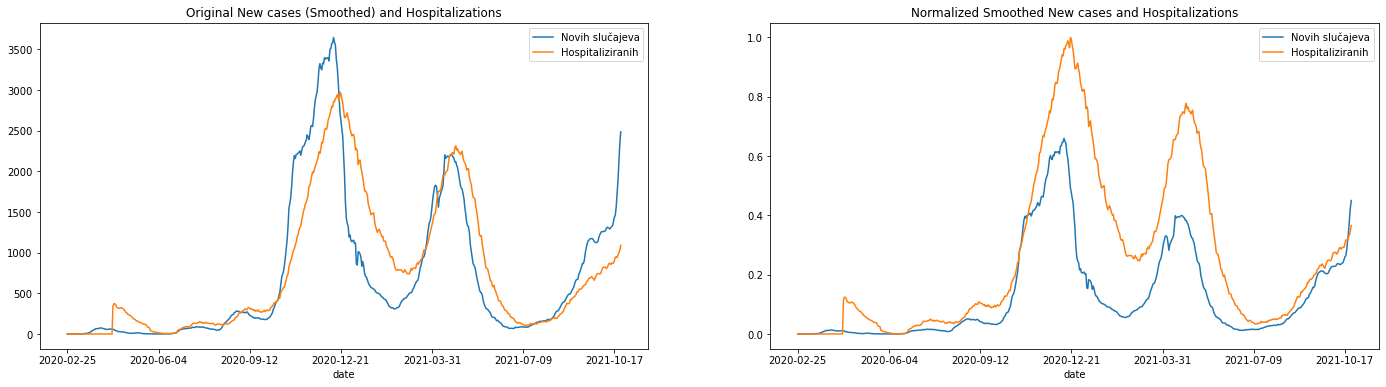

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=(24, 6))

ax[0].set_title('Original New cases (Smoothed) and Hospitalizations')
ax[1].set_title('Normalized Smoothed New cases and Hospitalizations')

df[[
    'date',
    'new_cases_smoothed', 
    'hosp_patients'
]].plot(x='date', kind='line', ax=ax[0])

df[[
    'date',
    'new_cases_smoothed_normalized', 
    'hosp_patients_normalized'
]].plot(x='date', kind='line', ax=ax[1])

ax[0].legend(["Novih slučajeva", "Hospitaliziranih"])
ax[1].legend(["Novih slučajeva", "Hospitaliziranih"])

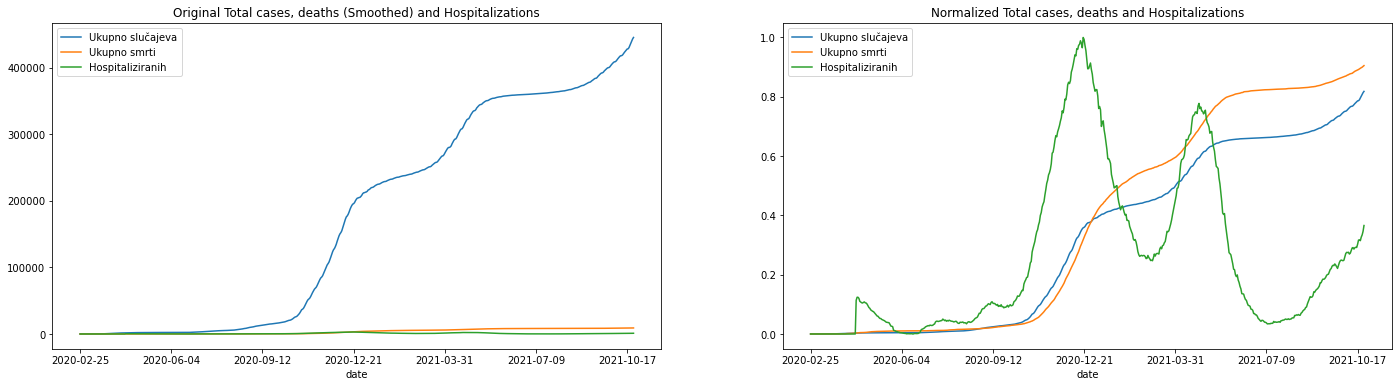

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(24, 6))

ax[0].set_title('Original Total cases, deaths (Smoothed) and Hospitalizations')
ax[1].set_title('Normalized Total cases, deaths and Hospitalizations')

df[[
    'date',
    'total_cases', 
    'total_deaths', 
    'hosp_patients'
]].plot(x='date', kind='line', ax=ax[0])

df[[
    'date',
    'total_cases_normalized', 
    'total_deaths_normalized', 
    'hosp_patients_normalized'
]].plot(x='date', kind='line', ax=ax[1])

ax[0].legend(["Ukupno slučajeva", "Ukupno smrti", "Hospitaliziranih"])
ax[1].legend(["Ukupno slučajeva", "Ukupno smrti", "Hospitaliziranih"])

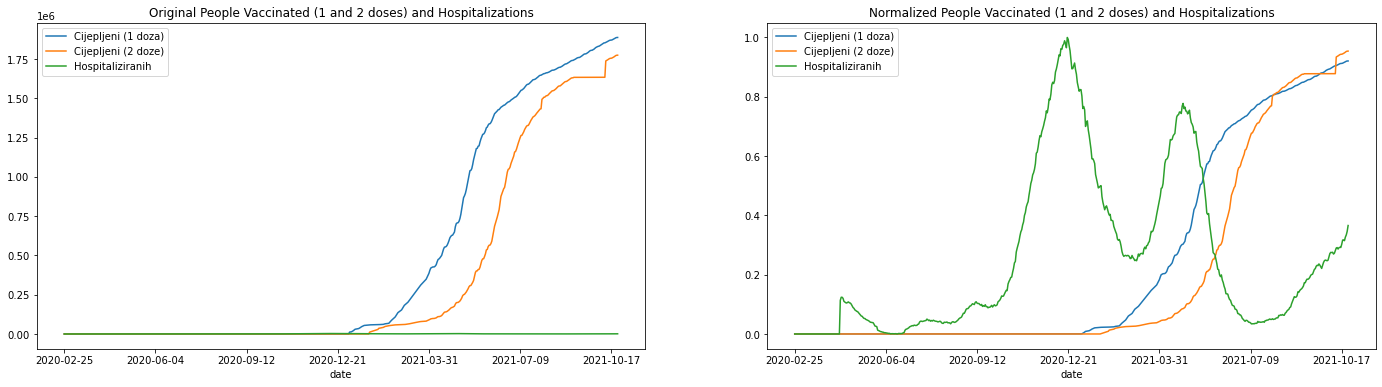

In [147]:
fig, ax = plt.subplots(ncols=2, figsize=(24, 6))

ax[0].set_title('Original People Vaccinated (1 and 2 doses) and Hospitalizations')
ax[1].set_title('Normalized People Vaccinated (1 and 2 doses) and Hospitalizations')

df[[
    'date',
    'people_vaccinated_interpolated', 
    'people_fully_vaccinated_interpolated', 
    'hosp_patients'
]].plot(x='date', kind='line', ax=ax[0])

df[[
    'date',
    'people_vaccinated_interpolated_normalized', 
    'people_fully_vaccinated_interpolated_normalized', 
    'hosp_patients_normalized'
]].plot(x='date', kind='line', ax=ax[1])

ax[0].legend(["Cijepljeni (1 doza)", "Cijepljeni (2 doze)", "Hospitaliziranih"])
ax[1].legend(["Cijepljeni (1 doza)", "Cijepljeni (2 doze)", "Hospitaliziranih"])

<AxesSubplot:>

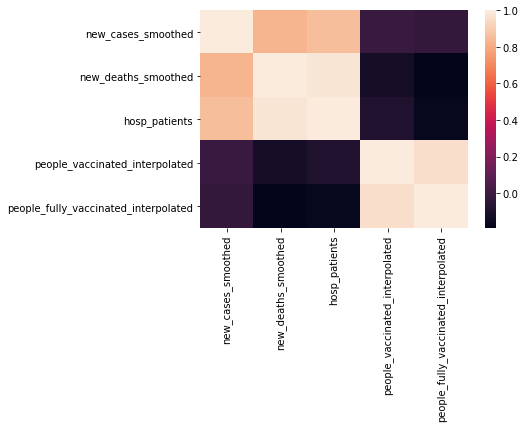

In [25]:
import seaborn as sns

corr_df = df[[
    'new_cases_smoothed', 
    'new_deaths_smoothed',
    'hosp_patients', 
    'people_vaccinated_interpolated', 
    'people_fully_vaccinated_interpolated'
]].corr()
sns.heatmap(corr_df)

<AxesSubplot:>

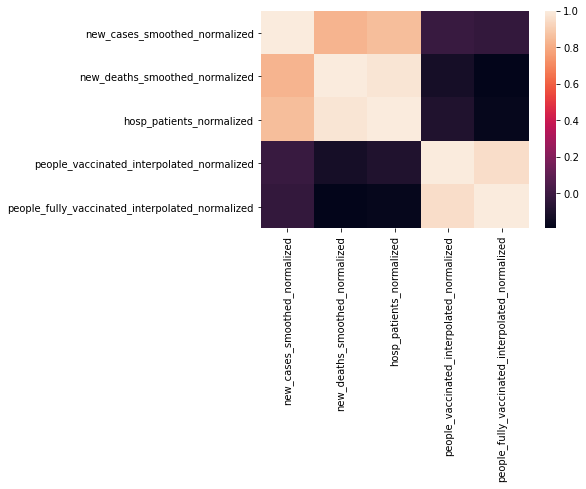

In [26]:
import seaborn as sns

corr_df = df[[
    'new_cases_smoothed_normalized', 
    'new_deaths_smoothed_normalized',
    'hosp_patients_normalized', 
    'people_vaccinated_interpolated_normalized', 
    'people_fully_vaccinated_interpolated_normalized'
]].corr()
sns.heatmap(corr_df)

<AxesSubplot:title={'center':'Normalized smoothed New deaths compared to Hospitalizations'}, xlabel='hosp_patients_normalized', ylabel='new_deaths_smoothed_normalized'>

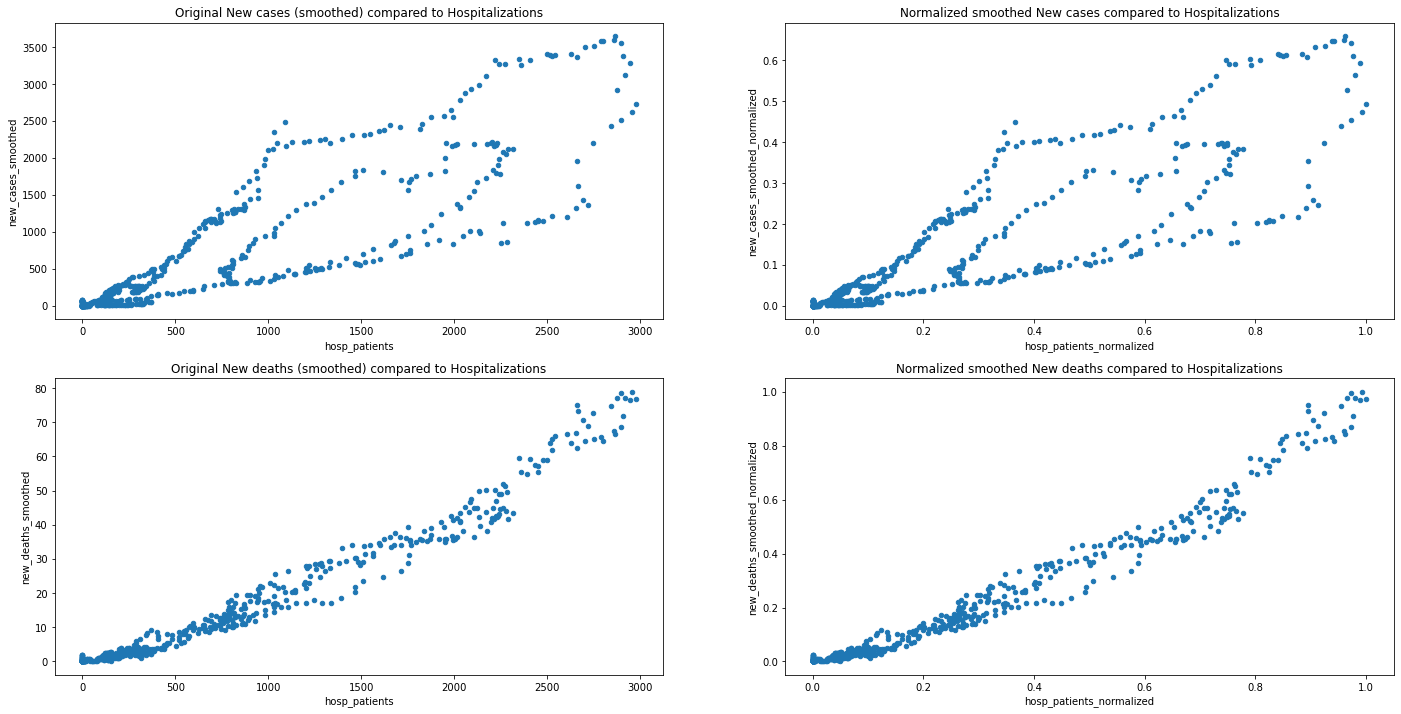

In [60]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))

ax[0, 0].set_title('Original New cases (smoothed) compared to Hospitalizations')
ax[0, 1].set_title('Normalized smoothed New cases compared to Hospitalizations')
ax[1, 0].set_title('Original New deaths (smoothed) compared to Hospitalizations')
ax[1, 1].set_title('Normalized smoothed New deaths compared to Hospitalizations')

df[[
    'new_cases_smoothed',
    'hosp_patients'
]].plot(x='hosp_patients', y='new_cases_smoothed', kind='scatter', ax=ax[0, 0])

df[[
    'new_cases_smoothed_normalized',
    'hosp_patients_normalized'
]].plot(x='hosp_patients_normalized', y='new_cases_smoothed_normalized', kind='scatter', ax=ax[0, 1])

df[[
    'new_deaths_smoothed',
    'hosp_patients'
]].plot(x='hosp_patients', y='new_deaths_smoothed', kind='scatter', ax=ax[1, 0])

df[[
    'new_deaths_smoothed_normalized',
    'hosp_patients_normalized'
]].plot(x='hosp_patients_normalized', y='new_deaths_smoothed_normalized', kind='scatter', ax=ax[1, 1])

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

X_name = 'hosp_patients'
y_name = 'new_cases_smoothed'

poly_reg_new_cases = PolynomialFeatures(degree=3)
X = df[X_name].values.reshape(-1, 1)
X = poly_reg_new_cases.fit_transform(X)
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr_new_cases = LinearRegression()
#lr = Ridge()
#lr = Lasso(alpha=1)
lr_new_cases.fit(X_train, y_train)

train_score = lr_new_cases.score(X_train, y_train)
test_score = lr_new_cases.score(X_test, y_test)
#mae = mean_absolute_error(y_test, lr_new_cases.predict(poly_reg_new_cases.transform(X_test)))
#mse = mean_squared_error(y_test, lr_new_cases.predict(poly_reg_new_cases.transform(X_test)))

print("Training score: {}".format(round(train_score, 2)))
print("Testing score: {}".format(round(test_score, 2)))
#print("Mean Absolute Error: {}".format(round(mae, 2)))
#print("Mean Squared Error: {}".format(round(mse, 2)))

Training score: 0.76
Testing score: 0.69


In [137]:
X_name = 'hosp_patients'
y_name = 'new_deaths_smoothed'

poly_reg_new_deaths = PolynomialFeatures(degree=2)
X = df[X_name].values.reshape(-1, 1)
X = poly_reg_new_deaths.fit_transform(X)
y = df[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr_new_deaths = LinearRegression()
#lr = Ridge()
#lr = Lasso(alpha=1)
lr_new_deaths.fit(X_train, y_train)

train_score = lr_new_deaths.score(X_train, y_train)
test_score = lr_new_deaths.score(X_test, y_test)
#mae = mean_absolute_error(y_test, lr_new_deaths.predict(poly_reg_new_deaths.transform(X_test)))
#mse = mean_squared_error(y_test, lr_new_deaths.predict(poly_reg_new_deaths.transform(X_test)))

print("Training score: {}".format(round(train_score, 2)))
print("Testing score: {}".format(round(test_score, 2)))
#print("Mean Absolute Error: {}".format(round(mae, 2)))
#print("Mean Squared Error: {}".format(round(mse, 2)))

Training score: 0.98
Testing score: 0.98


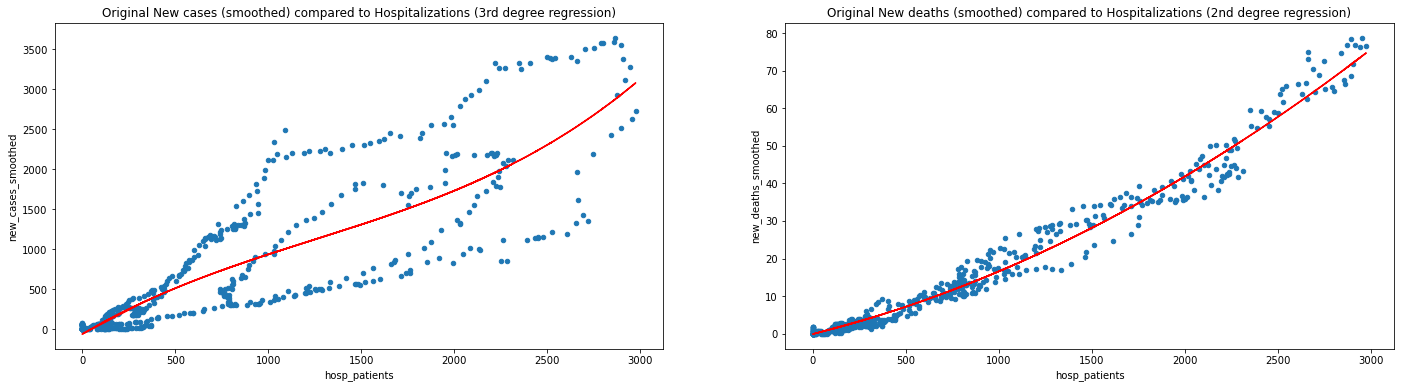

In [143]:
fig, ax = plt.subplots(ncols=2, figsize=(24, 6))

ax[0].set_title('Original New cases (smoothed) compared to Hospitalizations (3rd degree regression)')
ax[1].set_title('Original New deaths (smoothed) compared to Hospitalizations (2nd degree regression)')

df[[
    'new_cases_smoothed',
    'hosp_patients'
]].plot(x='hosp_patients', y='new_cases_smoothed', kind='scatter', ax=ax[0])
ax[0].plot(df['hosp_patients'], lr_new_cases.predict(poly_reg_new_cases.transform(df['hosp_patients'].values.reshape(-1, 1))), 'r')

df[[
    'new_deaths_smoothed',
    'hosp_patients'
]].plot(x='hosp_patients', y='new_deaths_smoothed', kind='scatter', ax=ax[1])
ax[1].plot(df['hosp_patients'], lr_new_deaths.predict(poly_reg_new_deaths.transform(df['hosp_patients'].values.reshape(-1, 1))), 'r')


In [144]:
diffs = df['hosp_patients'].diff()
avg_vacc_per_week = diffs.tail(7).mean()
X_predict = np.array([df['hosp_patients'].max() + (vacc * (i+1)) for i, vacc in enumerate([avg_vacc_per_week] * 100)])

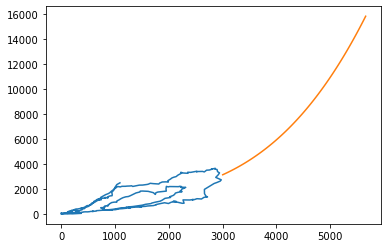

In [145]:
plt.plot(df['hosp_patients'], df['new_cases_smoothed'])
plt.plot(X_predict, lr_new_cases.predict(poly_reg_new_cases.transform(X_predict.reshape(-1, 1))))

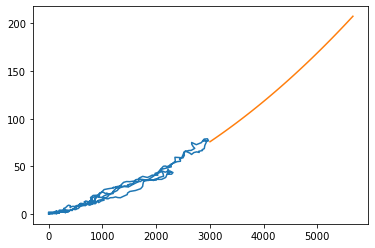

In [146]:
plt.plot(df['hosp_patients'], df['new_deaths_smoothed'])
plt.plot(X_predict, lr_new_deaths.predict(poly_reg_new_deaths.transform(X_predict.reshape(-1, 1))))